<a href="https://colab.research.google.com/github/renisio/Classifica-o-com-rede-neural-em-pessoas-com-esclerose-multipla/blob/main/EM_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#GPU

import tensorflow
device_name = tensorflow.test.gpu_device_name()
if device_name != '/device:GPU:0':
   raise SystemError('No hay GPU')
print('Found GPU at: {}'.format(device_name))

SystemError: No hay GPU

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import layers
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
import keras.activations,keras.losses,keras.metrics
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Mestrado/EM trabalho colegas/conversion_predictors_of_clinically_isolated_syndrome_to_multiple_sclerosis.csv")

In [ ]:
df.columns


Index(['Unnamed: 0', 'Gender', 'Age', 'Schooling', 'Breastfeeding',
       'Varicella', 'Initial_Symptom', 'Mono_or_Polysymptomatic',
       'Oligoclonal_Bands', 'LLSSEP', 'ULSSEP', 'VEP', 'BAEP',
       'Periventricular_MRI', 'Cortical_MRI', 'Infratentorial_MRI',
       'Spinal_Cord_MRI', 'Initial_EDSS', 'Final_EDSS', 'group'],
      dtype='object')

In [ ]:
df.head()

,Unnamed: 0,Gender,Age,Schooling,Breastfeeding,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,Initial_EDSS,Final_EDSS,group
0,0,1,34,20.0,1,1,2.0,1,0,1,1,0,0,0,1,0,1,1.0,1.0,1
1,1,1,61,25.0,3,2,10.0,2,1,1,0,1,0,0,0,0,1,2.0,2.0,1
2,2,1,22,20.0,3,1,3.0,1,1,0,0,0,0,0,1,0,0,1.0,1.0,1
3,3,2,41,15.0,1,1,7.0,2,1,0,1,1,0,1,1,0,0,1.0,1.0,1
4,4,2,34,20.0,2,1,6.0,2,0,1,0,0,0,1,0,0,0,1.0,1.0,1


In [ ]:
df["group"].describe()

count    273.000000
mean       1.542125
std        0.499137
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        2.000000
Name: group, dtype: float64

In [ ]:
#Esse resultado é uma visão geral de um DataFrame em Pandas

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               273 non-null    int64  
 1   Gender                   273 non-null    int64  
 2   Age                      273 non-null    int64  
 3   Schooling                272 non-null    float64
 4   Breastfeeding            273 non-null    int64  
 5   Varicella                273 non-null    int64  
 6   Initial_Symptom          272 non-null    float64
 7   Mono_or_Polysymptomatic  273 non-null    int64  
 8   Oligoclonal_Bands        273 non-null    int64  
 9   LLSSEP                   273 non-null    int64  
 10  ULSSEP                   273 non-null    int64  
 11  VEP                      273 non-null    int64  
 12  BAEP                     273 non-null    int64  
 13  Periventricular_MRI      273 non-null    int64  
 14  Cortical_MRI             2

In [ ]:
#Esse resultado mostra a quantidade de valores ausentes (NaN)
df.isna().sum()

Unnamed: 0                   0
Gender                       0
Age                          0
Schooling                    1
Breastfeeding                0
Varicella                    0
Initial_Symptom              1
Mono_or_Polysymptomatic      0
Oligoclonal_Bands            0
LLSSEP                       0
ULSSEP                       0
VEP                          0
BAEP                         0
Periventricular_MRI          0
Cortical_MRI                 0
Infratentorial_MRI           0
Spinal_Cord_MRI              0
Initial_EDSS               148
Final_EDSS                 148
group                        0
dtype: int64

In [ ]:
#df para mostrar apenas as linhas onde a coluna Schooling possui valores ausentes (NaN). Aqui está o que ele faz
df[df.Schooling.isna()]

,Unnamed: 0,Gender,Age,Schooling,Breastfeeding,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,Initial_EDSS,Final_EDSS,group
204,204,2,38,NaN,3,3,2.0,2,1,1,1,0,0,0,0,1,1,NaN,NaN,2


In [ ]:
#Essas duas linhas de código são usadas para filtrar o DataFrame df e remover as linhas com valores ausentes nas colunas

df=df[df['Initial_Symptom'].isna()==False]
df=df[df['Schooling'].isna()==False]

In [ ]:
#mostra a frequência de cada valor na coluna.

df.Initial_EDSS.value_counts()

Initial_EDSS
1.0    87
2.0    31
3.0     7
Name: count, dtype: int64

In [ ]:
# contagem de cada valor distinto na coluna Final_EDSS

df.Final_EDSS.value_counts()

Final_EDSS
1.0    80
2.0    34
3.0    11
Name: count, dtype: int64

In [ ]:
#o fillna(method='ffill') foi usado para substituir os valores ausentes por valores válidos mais recentes na mesma coluna

df['Initial_EDSS'].fillna(method='ffill', inplace=True)
df['Final_EDSS'].fillna(method='ffill', inplace=True)

In [ ]:
df.Initial_EDSS.value_counts()

Initial_EDSS
1.0    233
2.0     31
3.0      7
Name: count, dtype: int64

In [ ]:
df.Final_EDSS.value_counts()

Final_EDSS
1.0    226
2.0     34
3.0     11
Name: count, dtype: int64

In [ ]:
#As colunas Unnamed: 0, Initial_EDSS e Final_EDSS são removidas do DataFrame df.
#Todas as linhas que contêm qualquer valor ausente são removidas do DataFrame df.
#A tupla mostra o número de linhas e colunas restantes no DataFrame após as operações de remoção de colunas e linhas com valores ausentes.

#DataFrame df tem agora 271 linhas e 17 colunas.

df.drop(['Unnamed: 0','Initial_EDSS', 'Final_EDSS'], axis =1, inplace = True)
df.dropna(inplace= True)
df.shape

(271, 17)

In [ ]:
df.head()

,Gender,Age,Schooling,Breastfeeding,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,group
0,1,34,20.0,1,1,2.0,1,0,1,1,0,0,0,1,0,1,1
1,1,61,25.0,3,2,10.0,2,1,1,0,1,0,0,0,0,1,1
2,1,22,20.0,3,1,3.0,1,1,0,0,0,0,0,1,0,0,1
3,2,41,15.0,1,1,7.0,2,1,0,1,1,0,1,1,0,0,1
4,2,34,20.0,2,1,6.0,2,0,1,0,0,0,1,0,0,0,1


In [ ]:
#O código percorre todas as colunas do DataFrame df, exibe o nome da coluna e a distribuição
#dos valores nessa coluna (quantas vezes cada valor aparece), e separa as saídas de cada coluna
#com uma linha de traços. Isso é útil para revisar a distribuição de valores e identificar padrões ou anomalias em cada coluna.



for col in df:
  print(col)
  print(df[col].value_counts())
  print("--------------------------")

Gender
Gender
2    166
1    105
Name: count, dtype: int64
--------------------------
Age
Age
28    16
24    15
34    14
40    11
29    11
36    11
38    10
22    10
31    10
35     9
25     8
27     8
21     8
39     8
44     7
32     7
19     7
30     7
37     6
41     6
47     5
17     5
50     5
26     5
16     5
43     4
20     4
33     4
45     4
51     4
23     4
46     4
55     3
48     3
59     3
42     3
60     3
53     2
49     2
52     2
56     1
15     1
61     1
54     1
70     1
65     1
18     1
77     1
Name: count, dtype: int64
--------------------------
Schooling
Schooling
20.0    83
15.0    81
12.0    58
9.0     34
22.0     4
6.0      3
25.0     2
14.0     2
0.0      1
23.0     1
24.0     1
8.0      1
Name: count, dtype: int64
--------------------------
Breastfeeding
Breastfeeding
1    131
3     83
2     57
Name: count, dtype: int64
--------------------------
Varicella
Varicella
1    124
2    104
3     43
Name: count, dtype: int64
--------------------------
Initial_S

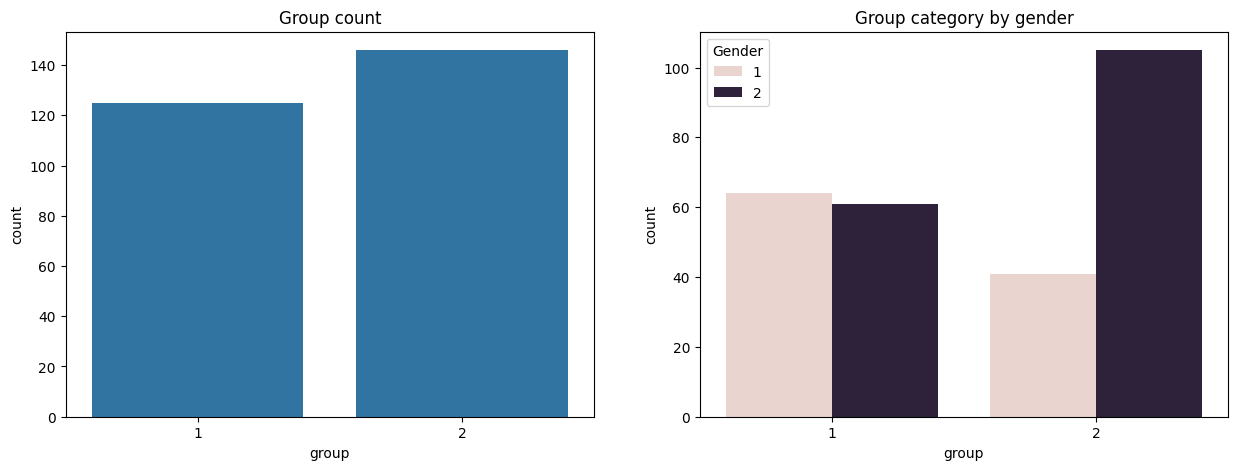

In [ ]:
ig,axes = plt.subplots(nrows=1,ncols = 2,figsize=(15,5))
sns.countplot(ax = axes[0],x='group',data = df);
sns.countplot(ax = axes[1],x='group',data = df,hue = 'Gender');

axes[1].title.set_text('Group category by gender')
axes[0].title.set_text('Group count')

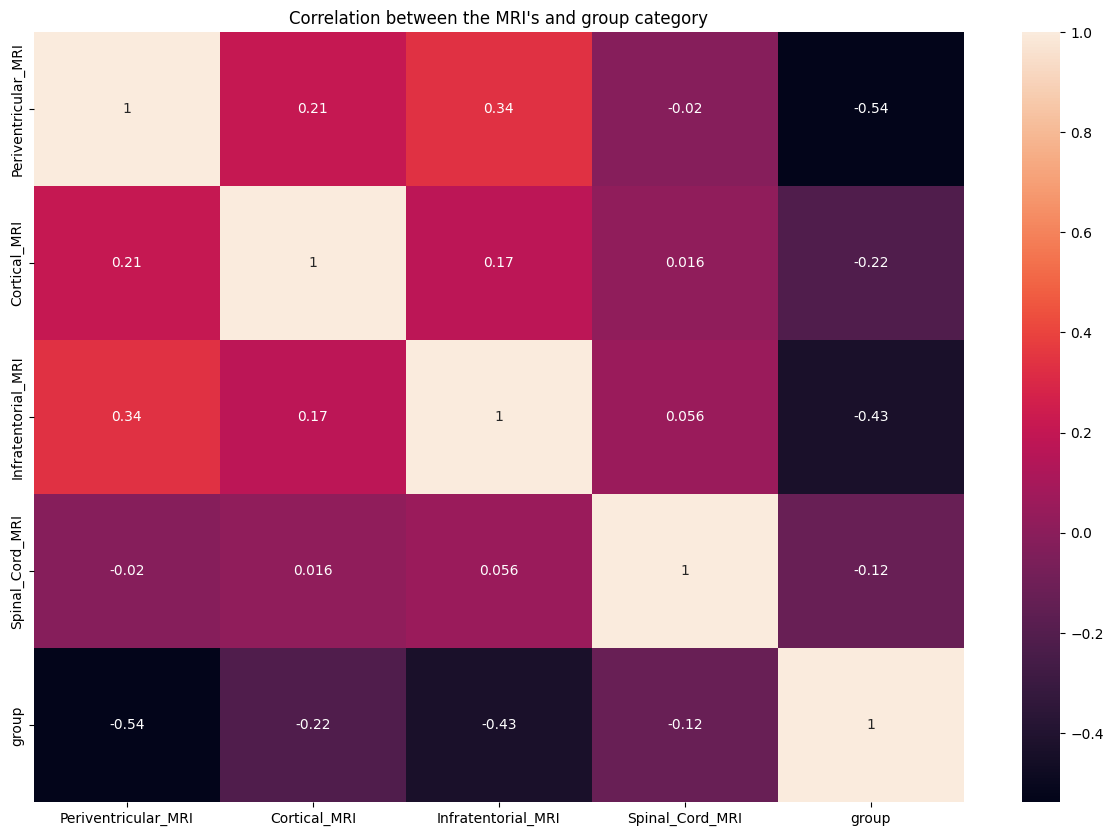

In [ ]:
#Esse código cria um mapa de calor para visualizar a correlação entre várias colunas do DataFrame


corr =df.loc[:,['Periventricular_MRI','Cortical_MRI','Infratentorial_MRI','Spinal_Cord_MRI','group']].corr()
plt.figure(figsize=(15,10))
sns.heatmap(data = corr,annot = True)
plt.title('Correlation between the MRI\'s and group category');

# Aqui Começa o jogo

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import recall_score, accuracy_score, roc_curve, auc

In [ ]:
## Escolha a variável alvo para classificação
target_variable = 'group' # Altere para a variável alvo desejada

In [ ]:
# Crie sequências para dados de séries temporais
sequence_length = 30  # Defina o número de passos de tempo em cada sequência
X_train_sequences = []
y_labels = []

In [ ]:
for i in range(len(df) - sequence_length):
    X_train_sequences.append(df.drop(columns=target_variable).iloc[i:i+sequence_length])
    y_labels.append(df[target_variable].iloc[i+sequence_length])

In [ ]:
X_train_sequences = np.array(X_train_sequences)
y_labels = np.array(y_labels)

In [ ]:
# Conversão da variável alvo para categórica (one-hot encoding):

num_classes = np.max(y_labels) + 1
y_labels_categorical = np.eye(num_classes)[y_labels]


In [ ]:
# Divisão dos dados em conjuntos de treinamento e validação:

#O código divide os dados em duas partes:

#Treinamento: 80% dos dados.
#Validação: 20% dos dados.



X_train_seq, X_val_seq, y_train_seq, y_val_seq = train_test_split(X_train_sequences, y_labels_categorical, test_size=0.2, random_state=42)

In [ ]:
# Build the GRU model
model = Sequential()
model.add(GRU(64, input_shape=(sequence_length, X_train_sequences.shape[2])))
model.add(Dense(num_classes, activation='softmax'))

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the GRU model
history = model.fit(X_train_seq, y_train_seq, epochs=30, batch_size=64, validation_data=(X_val_seq, y_val_seq))

Epoch 1/30
3/3 [==============================] - 3s 218ms/step - loss: 0.9758 - accuracy: 0.4479 - val_loss: 0.9140 - val_accuracy: 0.4898
Epoch 2/30
3/3 [==============================] - 0s 18ms/step - loss: 0.8398 - accuracy: 0.4792 - val_loss: 0.8196 - val_accuracy: 0.5306
Epoch 3/30
3/3 [==============================] - 0s 16ms/step - loss: 0.7603 - accuracy: 0.5729 - val_loss: 0.7476 - val_accuracy: 0.5714
Epoch 4/30
3/3 [==============================] - 0s 17ms/step - loss: 0.7063 - accuracy: 0.5885 - val_loss: 0.6891 - val_accuracy: 0.6122
Epoch 5/30
3/3 [==============================] - 0s 25ms/step - loss: 0.6570 - accuracy: 0.6250 - val_loss: 0.6400 - val_accuracy: 0.6531
Epoch 6/30
3/3 [==============================] - 0s 29ms/step - loss: 0.6144 - accuracy: 0.6562 - val_loss: 0.5965 - val_accuracy: 0.6531
Epoch 7/30
3/3 [==============================] - 0s 21ms/step - loss: 0.5806 - accuracy: 0.6719 - val_loss: 0.5605 - val_accuracy: 0.7143
Epoch 8/30
3/3 [==========

In [ ]:
# Predict classes using GRU

#O código gera sequências de dados para o conjunto de teste com o comprimento especificado por sequence_length.
 #Para cada possível posição no DataFrame (excluindo os últimos índices que não têm comprimento suficiente para uma
                                          #sequência completa), ele seleciona uma subsequência de dados e a adiciona à
                                          # lista X_test_sequences. O resultado é uma lista de sequências que pode ser
                                           #usada para avaliar o modelo


#explícita de que os dados foram divididos em lotes menores para a predição, mas, se necessário,
#a biblioteca do modelo pode gerenciar isso internamente.

X_test_sequences = []
for i in range(len(df) - sequence_length):
    X_test_sequences.append(df.drop(columns=target_variable).iloc[i:i+sequence_length])

In [ ]:
#Resumo em termos simples:

#Primeiro, você prepara os dados de teste.
#Em seguida, usa o modelo para fazer previsões sobre esses dados.
#Finalmente, converte essas previsões de probabilidades em respostas claras (as classes mais prováveis).



X_test_sequences = np.array(X_test_sequences)
y_pred = model.predict(X_test_sequences)
y_pred_classes = np.argmax(y_pred, axis=1)

8/8 [==============================] - 0s 3ms/step


In [ ]:
val_acc = model.evaluate(X_val_seq, y_val_seq)[1]
print(f"Validation Accuracy: {val_acc:.4f}")
print(classification_report(y_labels, y_pred_classes, labels=[1, 2]))

2/2 [==============================] - 0s 7ms/step - loss: 0.0167 - accuracy: 1.0000
Validation Accuracy: 1.0000
              precision    recall  f1-score   support

           1       0.99      1.00      0.99        95
           2       1.00      0.99      1.00       146

    accuracy                           1.00       241
   macro avg       0.99      1.00      1.00       241
weighted avg       1.00      1.00      1.00       241



Text(0.5, 1.0, 'Loss')

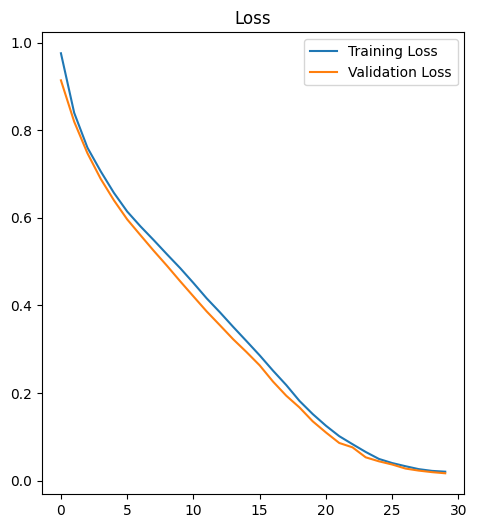

In [ ]:
# Plot loss and accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

Text(0.5, 1.0, 'Accuracy')

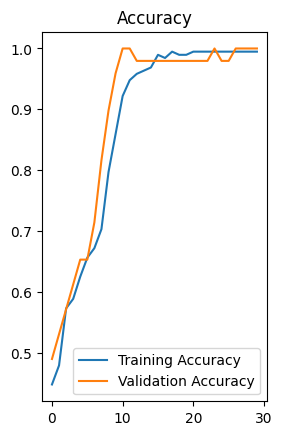

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

In [ ]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [ ]:
model.save("GRU MODEL.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<ipython-input-4-5b93d6e2e702>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Train', 'Test'], y=[train_size, test_size], ax=axes[0], palette='viridis')


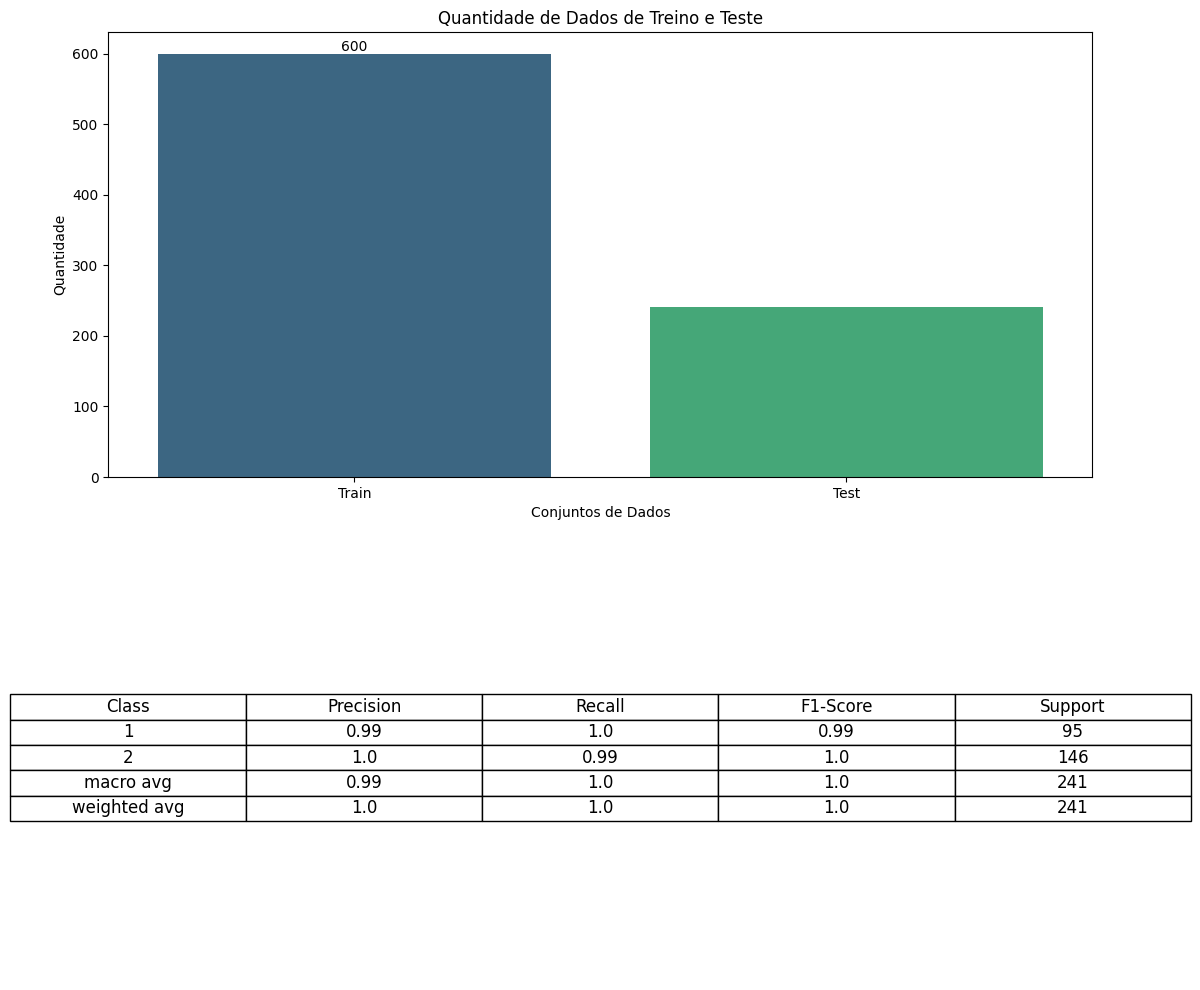

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Dados
train_size = 600
test_size = 241
train_accuracy = 0.95  # Exemplo de precisão no conjunto de treino
val_accuracy = 1.00    # Exemplo de precisão no conjunto de validação

# Dados de métricas para a tabela
metrics_data = {
    'Class': [1, 2, 'macro avg', 'weighted avg'],
    'Precision': [0.99, 1.00, 0.99, 1.00],
    'Recall': [1.00, 0.99, 1.00, 1.00],
    'F1-Score': [0.99, 1.00, 1.00, 1.00],
    'Support': [95, 146, 241, 241]
}

df_metrics = pd.DataFrame(metrics_data)

# Configurando o gráfico e a tabela lado a lado
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# 1. Gráfico de barras - Quantidade de dados de treino e teste
sns.barplot(x=['Train', 'Test'], y=[train_size, test_size], ax=axes[0], palette='viridis')
axes[0].set_title('Quantidade de Dados de Treino e Teste')
axes[0].set_ylabel('Quantidade')
axes[0].set_xlabel('Conjuntos de Dados')
axes[0].bar_label(axes[0].containers[0])

# 2. Tabela com Métricas de Desempenho
axes[1].axis('tight')
axes[1].axis('off')
table = axes[1].table(cellText=df_metrics.values, colLabels=df_metrics.columns, cellLoc='center', loc='center')

# Melhorando o visual da tabela
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)

# Exibindo o gráfico e a tabela juntos
plt.tight_layout()
plt.show()



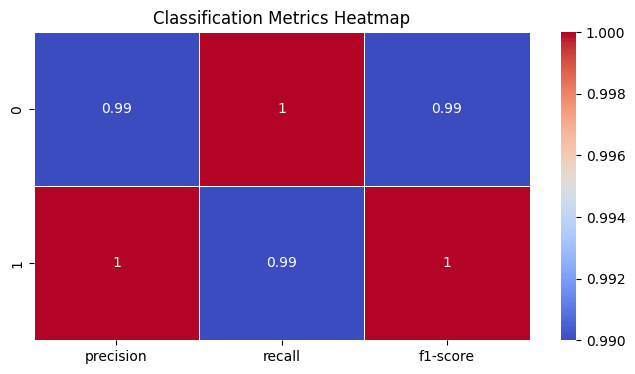

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Removendo linhas que não têm valores numéricos
df_numeric = df.iloc[:2, 1:4]

# Criando o mapa de calor
plt.figure(figsize=(8, 4))
sns.heatmap(df_numeric, annot=True, cmap="coolwarm", linewidths=.5)
plt.title('Classification Metrics Heatmap')
plt.show()
